# HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES
### This is a dataset containing 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. It's an expanded and more complex version of the often cited Boston Housing dataset.  

### Here I will compare several regression techniques: 
* Simple linear regression using features with highest correlation with target variable
* Linear regression with Ridge/Lasso regularization
* Principal Component Analysis
* XGBoost (gradient boosting decision trees)

## Quick notes:
* Reference to the data_description.txt file for the description of each variable
* For simplicity, I will use only the 'train' dataset for the analysis, splitting it into train+test (in order not to repeat the whole feature engineer process on the test dataset)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
train = pd.read_csv('train.csv')

# EXPLORATORY DATA ANALYSIS

In [100]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [101]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [103]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### We have 81 features and 1460 samples.
### We need to go through the different columns and manipulate them. Let's start.

In [104]:
train.drop('Id',axis=1,inplace=True) #We can drop ID since we already have the index column

### We start by checking/filling missing values.

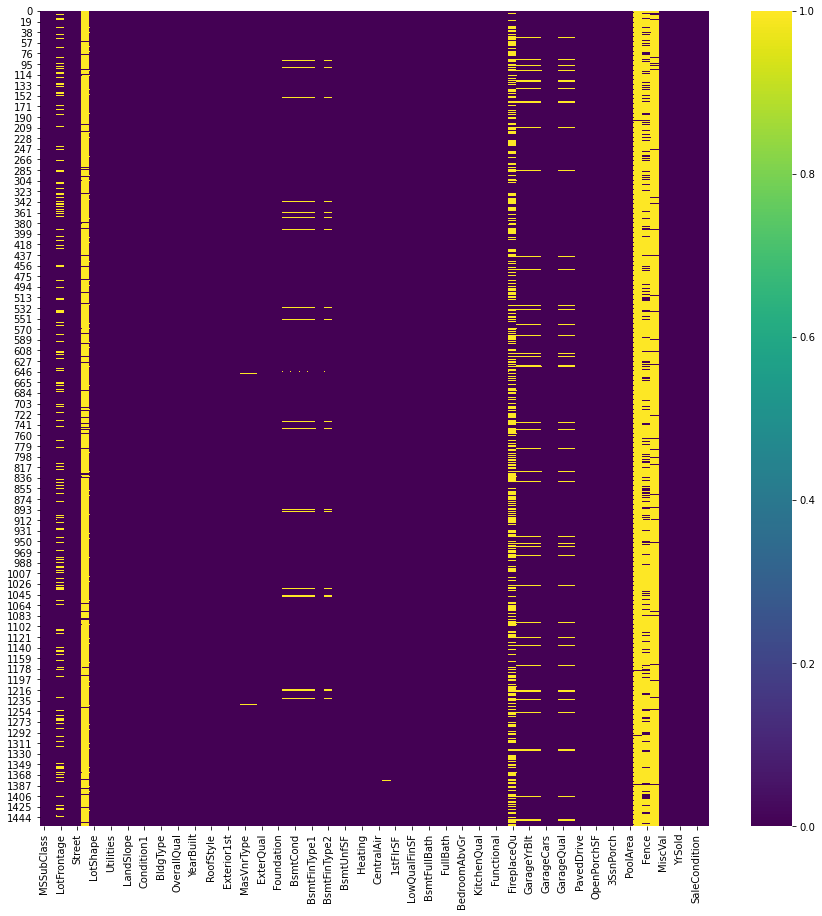

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')

In [106]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [107]:
train['Alley'].fillna('No_all',inplace=True) #Nan simply means no alley
train['Fence'].fillna('No_fen',inplace=True) #Nan simply means no fence
train['PoolQC'].fillna('No_pool',inplace=True) #Nan simply means no Pool
train['MiscFeature'].fillna('No_misc',inplace=True) #Nan simply means no misc. features
train['FireplaceQu'].fillna('No_fire',inplace=True) #Nan simply means no fireplace

In [108]:
train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [109]:
train['LotFrontage'].fillna(0.,inplace=True)

In [110]:
train['GarageType'].fillna('No_gt',inplace=True)
train['GarageFinish'].fillna('No_gf',inplace=True)
train['GarageCond'].fillna('No_gc',inplace=True)
train['GarageQual'].fillna('No_gq',inplace=True)

In [111]:
train['BsmtQual'].fillna('No_bq',inplace=True)
train['BsmtCond'].fillna('No_bc',inplace=True)
train['BsmtExposure'].fillna('No_be',inplace=True)
train['BsmtFinType1'].fillna('No_bf1',inplace=True)
train['BsmtFinType2'].fillna('No_bf2',inplace=True)

In [112]:
train['GarageYrBlt'].fillna(0,inplace=True) #Nan is when garage is not present, so we fill with zero (make sense: older year means less value, so we can replace 'no garage' with the lowest possible year)

In [113]:
train.columns[train.isna().any()]

Index(['MasVnrType', 'MasVnrArea', 'Electrical'], dtype='object')

In [114]:
train['MasVnrType'].fillna('No_mas',inplace=True)
train['MasVnrArea'].fillna(0.,inplace=True)

In [115]:
train[train['Electrical'].isna()]['Electrical']

1379    NaN
Name: Electrical, dtype: object

In [116]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [117]:
train['Electrical'].fillna('No_el',inplace=True)

In [118]:
train.columns[train.isna().any()]

Index([], dtype='object')

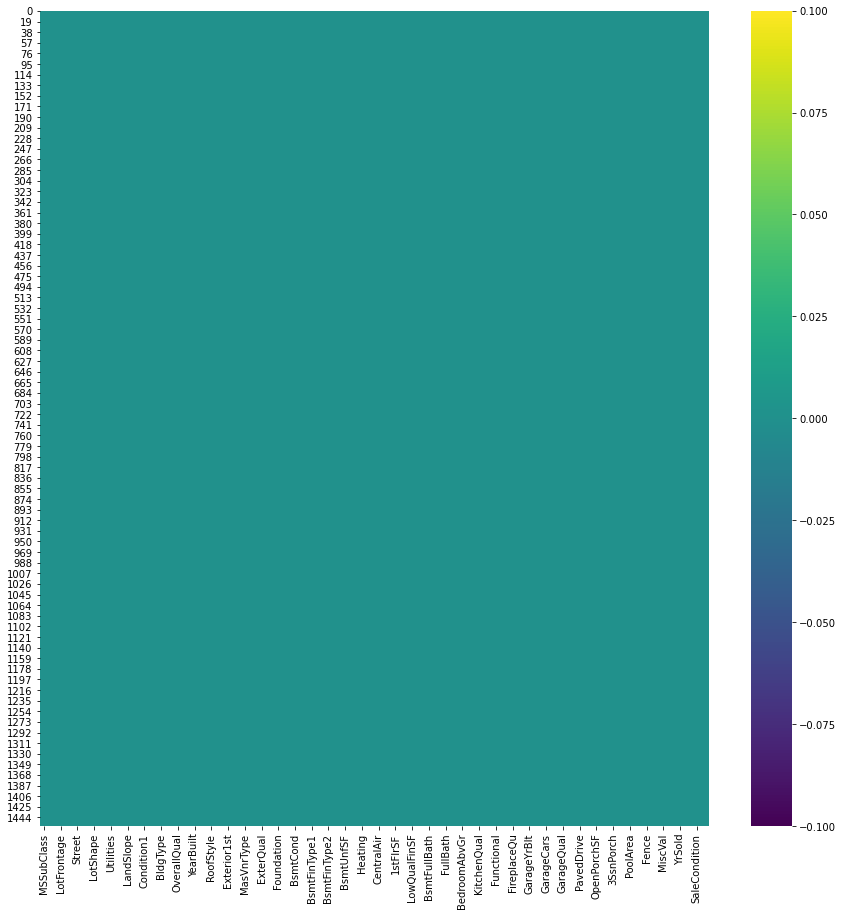

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')

### NO MORE MISSING VALUES! GOOD JOB!

### Now we will analyze numerical features, and check for outliers.

In [120]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = list(train.select_dtypes(include=numerics).columns)
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

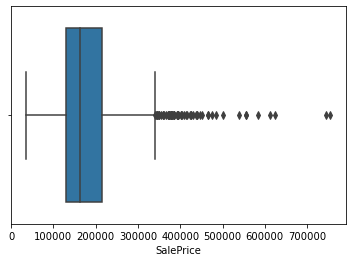

In [121]:
sns.boxplot(x='SalePrice',data=train) #TARGET VARIABLE

In [122]:
train[numerical_features].corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### As we could expect, overall quality and ground living area are the variables correlating most with sale price.

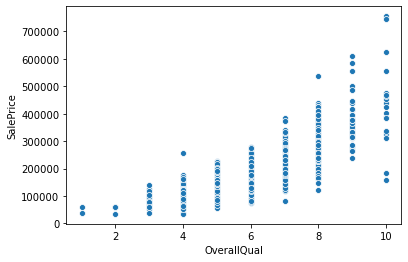

In [123]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train)

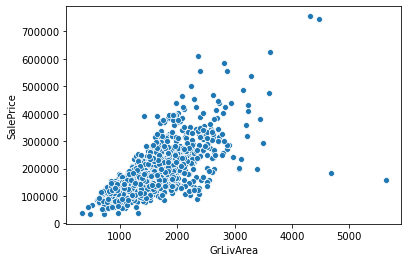

In [124]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

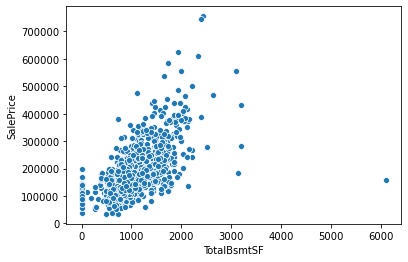

In [125]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train)

### There are 2 very big houses but with very low price. Why? Let's check those 2 points: 

In [126]:
train[train['GrLivArea']>4500]['OverallQual']

523     10
1298    10
Name: OverallQual, dtype: int64

#### Maybe they're old?

In [127]:
train[train['GrLivArea']>4500]['YearBuilt']

523     2007
1298    2008
Name: YearBuilt, dtype: int64

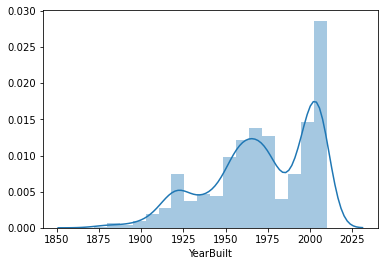

In [128]:
sns.distplot(train['YearBuilt'])

#### Not really: they are quite new... We will drop those 2 outliers for now (but first, we finish manipulating other features)

### NOW WE NEED TO USE ONE-HOT ENCODING TO CONVERT CATEGORICAL FEATURES. 
#### However, some of them may have little correlation with target variable.
### Let's explore categorical features:

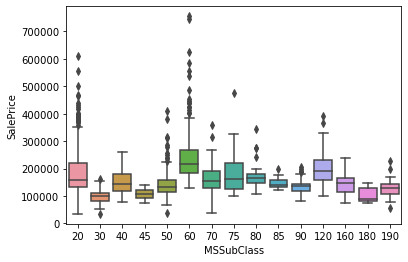

In [129]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=train)

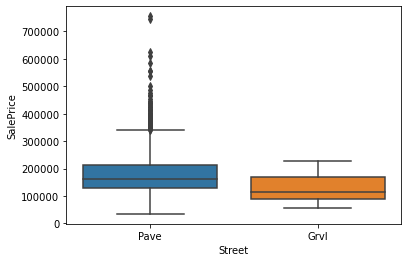

In [130]:
sns.boxplot(x='Street',y='SalePrice',data=train)

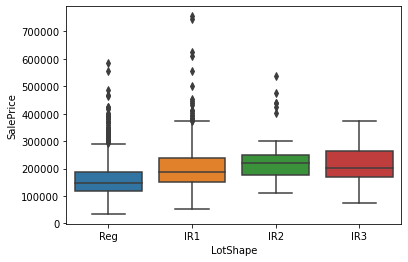

In [131]:
sns.boxplot(x='LotShape',y='SalePrice',data=train)

#### Ok, seems there is some degree of correlation. 

#### Some of the categorical features represent quality, so we can convert them into numerical features by using ranking:

In [133]:
train['ExterCond'].unique() #Ex=excellent, Gd=Good, TA=average, Fa=fair, Po=Poor

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [134]:
def quality(rank):
    ranking = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    if 'No' in rank:
        return 0
    return(ranking[rank])

In [135]:
convert_to_quality_columns = ['ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC',
                             'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC'] 

for column in convert_to_quality_columns:
    train[column] = train[column].apply(quality)

In [136]:
train['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1], dtype=int64)

In [137]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No_bf1', 'LwQ'], dtype=object)

In [138]:
def quality_bas(rank):
    ranking = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}
    if 'No' in rank:
        return 0
    return(ranking[rank])

train['BsmtFinType1'] = train['BsmtFinType1'].apply(quality_bas)
train['BsmtFinType2'] = train['BsmtFinType2'].apply(quality_bas)

In [139]:
train['CentralAir'] = train['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)

In [140]:
def finish_gar(rank):
    ranking = {'Fin':3, 'RFn':2, 'Unf':1}
    if 'No' in rank:
        return 0
    return(ranking[rank])
    
train['GarageFinish'] = train['GarageFinish'].apply(finish_gar)

In [141]:
train['GarageFinish'].unique()

array([2, 1, 3, 0], dtype=int64)

In [142]:
train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### LandSlope has 3 values representing 3 different slopes: Gtl = gentle, Mod = moderate, Sev = severe slope. We can convert it into a numerical feature ranking slope from 1 to 3:

In [143]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [144]:
def slope(rank):
    ranking = {'Gtl':1, 'Mod':2, 'Sev':3}
    return(ranking[rank])

train['LandSlope'] = train['LandSlope'].apply(slope)

#### We can't do much about the other features - let's use one-hot encoding:

In [145]:
categorical_features = list(train.select_dtypes(include='object').columns)

In [146]:
dummies = []
for feat in categorical_features:    
    dummies.append(pd.get_dummies(train[feat],drop_first=True))

train.drop(categorical_features,axis=1,inplace=True)
dummies.append(train)

train = pd.concat(dummies,axis=1)

In [147]:
train.columns

Index(['FV', 'RH', 'RL', 'RM', 'Pave', 'No_all', 'Pave', 'IR2', 'IR3', 'Reg',
       ...
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=219)

### GOOD! NOW WE HAVE ALL NUMERICAL FEATURES. In total, 219 features.

#### Now let's explore the degree of correlation with the target variable:

In [148]:
abs(train.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(20))

OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
PConc           0.497734
MasVnrArea      0.472614
Fireplaces      0.466929
HeatingQC       0.427649
NridgHt         0.402149
Name: SalePrice, dtype: float64

### Final step: we remove the 2 outliers. We also make a copy of the dataset, so at the end,  we will compare results with/without outliers.

In [149]:
train_copy =pd.DataFrame(train) #We make a copy of the dataset with outliers
train.drop(index=[523,1298],axis=0,inplace=True) #outliers

# REGRESSION

### NOW WE CAN START THE REGRESSION. WE WILL TRY THE FOLLOWING APPROACHES: 
* WE KEEP ONLY HIGH-CORR. FEATURES AND DO LINEAR REGRESSION
* WE TRY TO FIND IDEAL NUMBER OF FEATURES USING L1 (LASSO) REGULARIZATION
* WE TRY TO FIND IDEAL NUMBER OF FEATURES USING L2 (RIDGE) REGRESSION
* WE USE PCA TO REDUCE DIMENSIONS
* WE USE XGBOOST

### Linear regression keeping 5 features with highest correlation

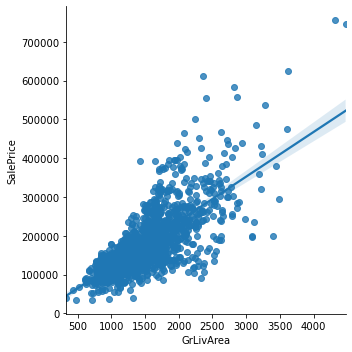

In [59]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

RMSE: 32985.77401288953


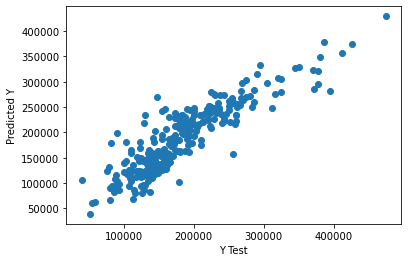

In [62]:
X = train[['OverallQual','GrLivArea','ExterQual','KitchenQual','GarageCars']] #5 highest-corr
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [66]:
np.mean(train['SalePrice'])

180932.91906721535

In [65]:
np.std(train['SalePrice'])

79467.78892987774

### RMSE of predictions is 33.0k, while average sale price is 180.1k. Let's see if we improve by adding 5 features with high correlation:

RMSE: 31000.357101532023


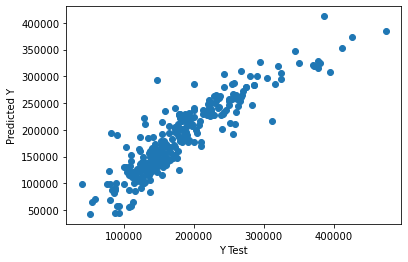

In [67]:
X = train[['OverallQual','GrLivArea','ExterQual','KitchenQual','GarageCars',
           'GarageArea','TotalBsmtSF','1stFlrSF','BsmtQual','GarageFinish']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### RMSE down to 31.0k. So, let's use Ridge and Lasso regularization to find optimal number of features to be included.

### Ridge regularization:

In [68]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import RidgeCV
alpha_list = np.logspace(-3, 3, 100)
#print(alpha_list)
rid = RidgeCV(cv=5, alphas=alpha_list)
rid.fit(X_train, y_train)
predictions = rid.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',rid.alpha_)

RMSE: 25890.97247015456
alpha:  20.09233002565046


### Best result is with alpha=20,where we get an rmse of about 25.9k:

Text(0, 0.5, 'Predicted Y')

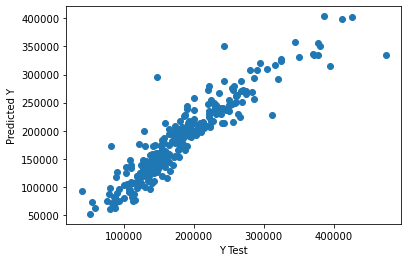

In [70]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Lasso regularization:

RMSE: 25556.704809656334
alpha:  123.28467394420659
number of features:  92


Text(0, 0.5, 'Predicted Y')

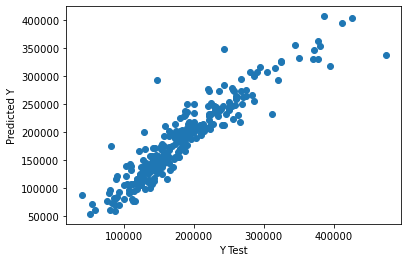

In [71]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LassoCV
alpha_list = np.logspace(-3, 3, 100)
#print(alpha_list)
las = LassoCV(cv=5, alphas=alpha_list, random_state=101)
las.fit(X_train, y_train)
predictions = las.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',las.alpha_)
print('number of features: ',np.sum(las.coef_!=0))

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Here we find that the ideal number of features is n=92 (alpha=123), where we get an rmse of 25.6k. Not bad!

## Principal component analysis

In [73]:
from sklearn.decomposition import PCA

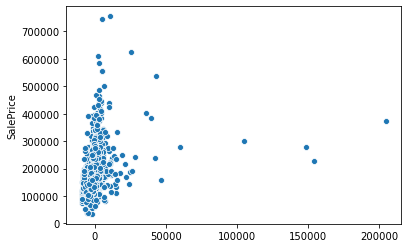

In [74]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
sns.scatterplot(X_train_pca[:,0],y_train)

#### We want to try by decomposing into different number of components:

In [75]:
components = [2,3,5,10,20,50,70,90,95,100,105,110,130,150,200]
rmse = []
train_score = []
test_score = []
lm = LinearRegression()
    
for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lm.fit(X_train_pca,y_train)
    predictions = lm.predict(X_test_pca)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    train_score.append(lm.score(X_train_pca,y_train))
    test_score.append(lm.score(X_test_pca,y_test))
    
results_pca = pd.DataFrame(list(zip(components,rmse,train_score,test_score)),
                       columns=['components','rmse','train_score','test_score'])
results_pca

,components,rmse,train_score,test_score
0,2,41615.213178,0.711936,0.643572
1,3,41811.069695,0.717207,0.640209
2,5,40045.893225,0.735958,0.669947
3,10,38069.682432,0.776889,0.701718
4,20,34557.796993,0.828659,0.754212
5,50,27867.181242,0.901350,0.840172
6,70,27177.058081,0.908793,0.847990
7,90,26789.431573,0.915850,0.852295
8,95,26817.816851,0.917020,0.851982
9,100,26667.523935,0.918818,0.853636


### Best result is with n=110 components, where RMSE is about 26.2k. Slightly worse than Lasso+linear regression.

## XGBoost analysis 
#### Problem: it doesn't accept duplicated columns. We need to rename some of them.

In [77]:
duplicated = list(X_train.loc[:,X_train.columns.duplicated()].columns)
duplicated

['Pave',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',
 'RRAe',
 'RRAn',
 'RRNn',
 'AsphShn',
 'BrkFace',
 'CBlock',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'BrkFace',
 'Stone',
 'CBlock',
 'Stone',
 'Shed']

In [78]:
duplicated = list(X_train.loc[:,X_train.columns.duplicated()].columns)
duplicated

cols = []
count = 1
for column in X_train.columns:
    if column in duplicated:
        cols.append(f'{column}_{count}')
        count+=1
        continue
    cols.append(column)
X_train.columns = cols
X_test.columns = cols

In [80]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=101)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
predictions = xgb_model.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 24773.216147969273


### RMSE using default parameters is 24.7k. Not bad. Let's see if we can improve by tuning parameters.

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[3,4,5,6,7]} #Depth of decision tree
grid = GridSearchCV(xgb.XGBRegressor(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=3, score=0.916, total=   1.2s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ......................... max_depth=3, score=0.907, total=   0.8s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ......................... max_depth=3, score=0.904, total=   0.6s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.911, total=   0.7s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.870, total=   0.7s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.882, total=   0.7s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.917, total=   0.7s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.898, total=   0.6s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.917, total=   0.6s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   21.3s finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [84]:
grid.best_params_

{'max_depth': 3}

In [85]:
predictions = grid.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 23680.02850650426


### It seems we had an improvement by tuning the parameter max_depth: now RMSE is 23.7k. Can we do better by tuning more parameters?

In [86]:
max_depth = grid.best_params_['max_depth']
param_grid = {'alpha':[0.1,1,10], 'gamma': [0,1], 'min_child_weight':[1,3,5]}
grid = GridSearchCV(xgb.XGBRegressor(max_depth = max_depth),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] alpha=0.1, gamma=0, min_child_weight=1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, gamma=0, min_child_weight=1, score=0.916, total=   1.2s
[CV] alpha=0.1, gamma=0, min_child_weight=1 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  alpha=0.1, gamma=0, min_child_weight=1, score=0.907, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=1 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  alpha=0.1, gamma=0, min_child_weight=1, score=0.904, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=1 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=1, score=0.911, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=1 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=1, score=0.870, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=3 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=3, score=0.921, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=3 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=3, score=0.910, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=3 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=3, score=0.896, total=   0.6s
[CV] alpha=0.1, gamma=0, min_child_weight=3 ..........................
[CV]  alpha=0.1, gamma=0, min_child_weight=3, score=0.908, total=   0.7s
[CV] alpha=0.1, gamma=0, min_child_weight=3 ...................

[CV]  alpha=10, gamma=0, min_child_weight=1, score=0.916, total=   0.8s
[CV] alpha=10, gamma=0, min_child_weight=1 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=1, score=0.907, total=   0.7s
[CV] alpha=10, gamma=0, min_child_weight=1 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=1, score=0.904, total=   0.6s
[CV] alpha=10, gamma=0, min_child_weight=1 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=1, score=0.911, total=   0.7s
[CV] alpha=10, gamma=0, min_child_weight=1 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=1, score=0.870, total=   0.6s
[CV] alpha=10, gamma=0, min_child_weight=3 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=3, score=0.921, total=   0.7s
[CV] alpha=10, gamma=0, min_child_weight=3 ...........................
[CV]  alpha=10, gamma=0, min_child_weight=3, score=0.909, total=   0.6s
[CV] alpha=10, gamma=0, min_child_weight=3 ...........................

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   59.2s finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=3, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
         

In [87]:
grid.best_params_

{'alpha': 0.1, 'gamma': 0, 'min_child_weight': 3}

In [88]:
predictions = grid.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 24355.150336764353


### Seems we didn't improve. So we will keep max_depth=3 + default parameters.

## Summary so far:
* Simple linear regression with 10 top-highest correl. features: RMSE = 31.0k
* Linear regression with Ridge regularization: RMSE = 25.9k
* Linear regression with Lasso regularization: RMSE = 25.6k
* Principal component analysis: RMSE = 26.2k
* XGBoost: RMSE = 23.7k

# What if we didn't remove the outliers?
### Let's see what happens to the different regression methods if we include the 2 outliers.

In [155]:
train = train_copy #This dataset contains the 2 outliers
train.count()

FV           1460
RH           1460
RL           1460
RM           1460
Pave         1460
             ... 
PoolQC       1460
MiscVal      1460
MoSold       1460
YrSold       1460
SalePrice    1460
Length: 219, dtype: int64

### Simple linear regression

MAE: 24150.404221734105
MSE: 2084759698.8862448
RMSE: 45659.16883700628


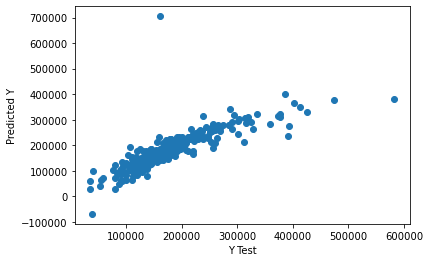

In [156]:
X = train[['OverallQual','GrLivArea','ExterQual','KitchenQual','GarageCars',
           'GarageArea','TotalBsmtSF','1stFlrSF','BsmtQual','GarageFinish']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### As we can see, the presence of the outliers causes problems in some of the predicted values: there is a house with saleprice of about 180k, but its predicted value is 700k. Also, RMSE is now 45.7k, significantly worse.

### With Lasso regularization:

RMSE: 46491.516093103106
alpha:  284.8035868435805
number of features:  70


Text(0, 0.5, 'Predicted Y')

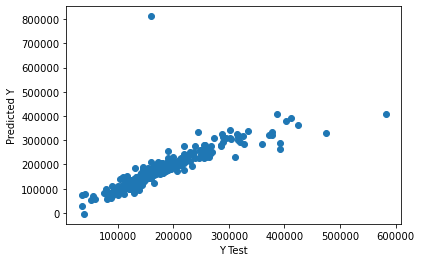

In [157]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LassoCV
alpha_list = np.logspace(-3, 3, 100)
#print(alpha_list)
las = LassoCV(cv=5, alphas=alpha_list, random_state=101)
las.fit(X_train, y_train)
predictions = las.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',las.alpha_)
print('number of features: ',np.sum(las.coef_!=0))

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Same problem here: linear regression is not robust against outliers.

### We can therefore try XGBoost:

In [159]:
duplicated = list(X_train.loc[:,X_train.columns.duplicated()].columns)
duplicated

cols = []
count = 1
for column in X_train.columns:
    if column in duplicated:
        cols.append(f'{column}_{count}')
        count+=1
        continue
    cols.append(column)
X_train.columns = cols
X_test.columns = cols

RMSE: 26217.85800105321


Text(0, 0.5, 'Predicted Y')

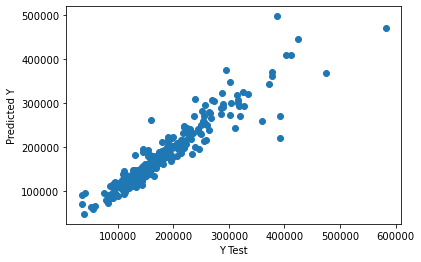

In [163]:
xgb_model = xgb.XGBRegressor(random_state=101, max_depth=3)
xgb_model.fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### It seems that XGBoost instead is robust against the outliers: RMSE is down to 26.2k and no weird predictions appear in the plot

## In conclusion, we can use the XGBoost model for the prediction of the house saleprices. Even including outliers, we obtain an RMSE of about 26k (to be compared with an average saleprice of 180k)